In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas_datareader as data

In [5]:
start ='2010-01-01'
end='2019-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564357
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027298
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416679
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389565
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813286
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337990


In [7]:
df= df.reset_index()#to reset date as we do not want that as index
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564357
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [8]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


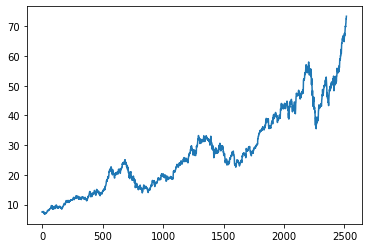

In [9]:
plt.plot(df.Close) #will show closing price of tesla stock

In [10]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [11]:
ma100=df.Close.rolling(100).mean()#moving average
ma100 #first 100 will be null bcoz it requires 100 value data to calculate mean

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

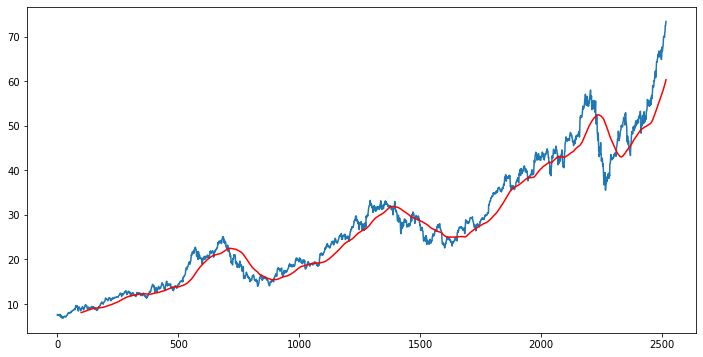

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')#simple graph as output for 100 days moving avg,moving avg are used by stock anaylyst they work with different moving avg

In [14]:
ma200=df.Close.rolling(200).mean()#moving average
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

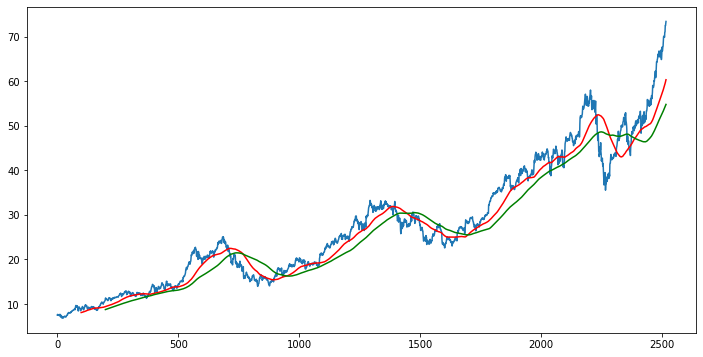

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [16]:
df.shape

(2517, 5)

In [20]:
#spliting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)]) #70 % data as trainig data
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])#30 % as testing and if we add the splitting values we get the above number 2517

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [19]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [21]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [23]:
#for stack lstm model we have to scale down the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [25]:
data_training_array.shape

(1761, 1)

In [28]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
x_train,y_train=np.array(x_train),np.array(y_train)#converting to numpy arrays so that lstm can use the data

In [ ]:
#ML MODEL

In [36]:
from keras.layers import Dense,Dropout,LSTM
from tensorflow.keras import Sequential

In [42]:
#simple ml model
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
            input_shape=(x_train.shape[1],1)))#working with closing column thats why one
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))#to connect all the layers

In [43]:
model.summary() #summary of lstm model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)               9

In [44]:
model.compile(optimizer='adam',loss='mean_squared_error')#The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. For every data point, you take the distance vertically from the point to the corresponding y value on the curve fit (the error), and square the value.
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 34s 417ms/step - loss: 0.0633
Epoch 2/50
52/52 [==============================] - 21s 404ms/step - loss: 0.0136
Epoch 3/50
52/52 [==============================] - 20s 390ms/step - loss: 0.0114
Epoch 4/50
52/52 [==============================] - 21s 398ms/step - loss: 0.0095
Epoch 5/50
52/52 [==============================] - 20s 392ms/step - loss: 0.0091
Epoch 6/50
52/52 [==============================] - 20s 381ms/step - loss: 0.0088
Epoch 7/50
52/52 [==============================] - 20s 396ms/step - loss: 0.0087
Epoch 8/50
52/52 [==============================] - 21s 411ms/step - loss: 0.0092
Epoch 9/50
52/52 [==============================] - 20s 390ms/step - loss: 0.0077
Epoch 10/50
52/52 [==============================] - 18s 341ms/step - loss: 0.0077
Epoch 11/50
52/52 [==============================] - 16s 309ms/step - loss: 0.0074
Epoch 12/50
52/52 [==============================] - 16s 314ms/step - loss: 0.0075
Epoch 13/50
5

In [45]:
model.save('keras_model.h5')

In [46]:
#predicitng values for that using testing data i need previous 100 days value 
past_100_days=data_training.tail(100)

In [47]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [48]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [49]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [50]:
input_data.shape

(856, 1)

In [52]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [53]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [54]:
#making predictions

y_predicted=model.predict(x_test)

In [55]:
y_predicted.shape

(756, 1)

In [56]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [57]:
y_predicted

array([[0.12701687],
       [0.1276015 ],
       [0.12816285],
       [0.1286685 ],
       [0.12910283],
       [0.1294516 ],
       [0.12971303],
       [0.12990662],
       [0.13006765],
       [0.13022444],
       [0.13041121],
       [0.13064289],
       [0.13091984],
       [0.1312517 ],
       [0.13163862],
       [0.13207042],
       [0.13253623],
       [0.13302317],
       [0.13351427],
       [0.13402212],
       [0.13455352],
       [0.13511136],
       [0.13568825],
       [0.1362806 ],
       [0.13696446],
       [0.13780636],
       [0.13887167],
       [0.14021748],
       [0.14188772],
       [0.14390084],
       [0.14624658],
       [0.14889172],
       [0.15179892],
       [0.15489215],
       [0.15816021],
       [0.16157672],
       [0.16511482],
       [0.16869518],
       [0.17228767],
       [0.17586775],
       [0.17940593],
       [0.18281749],
       [0.18613002],
       [0.1893697 ],
       [0.19255906],
       [0.19571145],
       [0.19882756],
       [0.201

In [58]:
scaler.scale_

array([0.02099517])

In [60]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

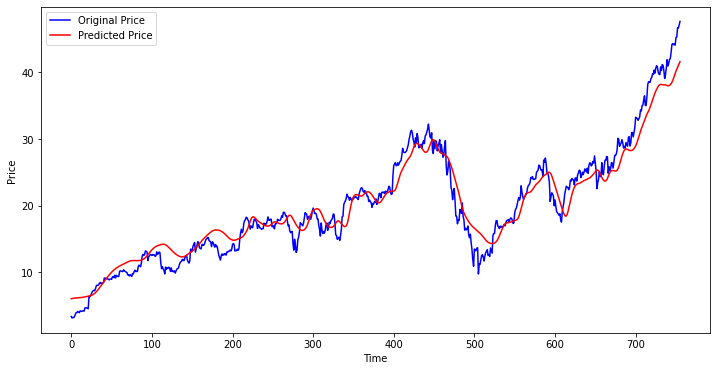

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()